In [3]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [2]:
def show_image(matrix):
    plt.imshow(matrix)
    plt.show()

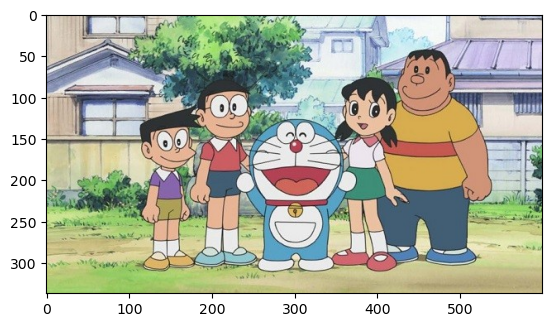

array([[221, 218, 209, ..., 138, 149, 171],
       [222, 219, 210, ..., 148, 159, 181],
       [221, 218, 209, ..., 147, 155, 176],
       ...,
       [159, 202, 110, ..., 197, 185, 137],
       [159, 202, 110, ..., 196, 184, 136],
       [156, 201, 106, ..., 196, 184, 136]], dtype=uint8)

In [29]:
import cv2
orig = cv2.imread('doraemon.jpg')
# Convert the image from BGR to RGB
rgb_image = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
show_image(rgb_image)

A = rgb_image;
# Reshape A to a 2D matrix
A_2D = A.reshape((A.shape[0],-1))
A_2D


In [69]:
A.shape,A_2D.shape     #Converted 3D to 2D

((337, 600, 3), (337, 1800))

In [89]:
def plot_svd(A ,compress_percent):
    n = len(A)
    U,S,V = svd(A)
    
    imgs = []
    percentage_of_singularValue_to_use = 100- compress_percent;
    num_of_SingVal = int((percentage_of_singularValue_to_use * len(S))/100)
    for i in range(num_of_SingVal):
        imgs.append(S[i]*np.outer(U[:,i],V[i]))
            
    combined_imgs = []  
    for i in range(n):
        img = sum(imgs[:i+1])
    combined_imgs.append(img)
           
    print("\nCombining all the above ones , we get our compressed matrix A :")   
    print(np.round(combined_imgs,2))
    
    return U , S , V , combined_imgs

In [100]:
[U,S,V,combined_imgs]=plot_svd(A_2D,0)


Combining all the above ones , we get our compressed matrix A :
[[[221. 218. 209. ... 138. 149. 171.]
  [222. 219. 210. ... 148. 159. 181.]
  [221. 218. 209. ... 147. 155. 176.]
  ...
  [159. 202. 110. ... 197. 185. 137.]
  [159. 202. 110. ... 196. 184. 136.]
  [156. 201. 106. ... 196. 184. 136.]]]


In [101]:
final = np.array(combined_imgs)
final = final.reshape((final.shape[1],final.shape[2]))
#Convert back to 3D
final = final.reshape((final.shape[0],int(final.shape[1]/3),3))
final = final/255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


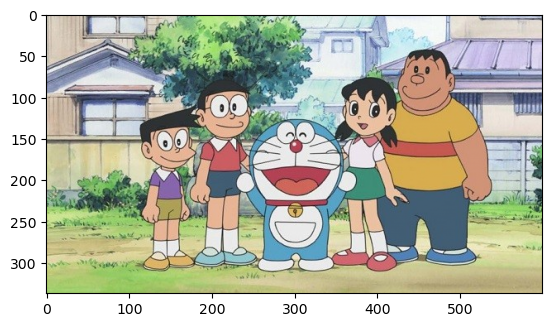

In [102]:
show_image(final)